# Import libraries 

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book= pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [4]:
df=pd.get_dummies(book)
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
k=min(df.mean())
k

0.037

# Apriori Algorithm 

In [6]:
frequent_itemsets = apriori(df, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
128,0.0440,"(YouthBks, RefBks, ChildBks, CookBks, GeogBks)"
129,0.0465,"(YouthBks, ChildBks, CookBks, ArtBks, GeogBks)"
130,0.0450,"(RefBks, ChildBks, CookBks, GeogBks, DoItYBks)"
131,0.0535,"(ChildBks, CookBks, ArtBks, GeogBks, DoItYBks)"


In [7]:
frequent_itemsets1 = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"
96,0.0560,"(ArtBks, YouthBks, GeogBks, CookBks)"
97,0.0650,"(ArtBks, GeogBks, DoItYBks, CookBks)"
98,0.0510,"(YouthBks, ChildBks, CookBks, GeogBks, DoItYBks)"


In [8]:
frequent_itemsets2 = apriori(df, min_support=0.06, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
71,0.0610,"(ArtBks, ChildBks, RefBks, CookBks)"
72,0.0785,"(ChildBks, GeogBks, RefBks, CookBks)"
73,0.0835,"(ArtBks, ChildBks, GeogBks, CookBks)"
74,0.0600,"(YouthBks, GeogBks, DoItYBks, CookBks)"


In [9]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.423,0.0850,0.748899,1.770446,0.036990,2.297877
3,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
4,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
...,...,...,...,...,...,...,...,...,...
130,"(ArtBks, GeogBks, DoItYBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304
131,"(ArtBks, GeogBks, DoItYBks)","(ChildBks, CookBks)",0.0730,0.256,0.0535,0.732877,2.862800,0.034812,2.785231
132,"(ArtBks, ChildBks, GeogBks, RefBks)",(CookBks),0.0495,0.431,0.0405,0.818182,1.898334,0.019166,3.129500
133,"(ArtBks, GeogBks, CookBks, RefBks)",(ChildBks),0.0460,0.423,0.0405,0.880435,2.081406,0.021042,4.825818


In [10]:
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
...,...,...,...,...,...,...,...,...,...
130,"(ArtBks, ChildBks, DoItYBks, CookBks)",(GeogBks),0.0820,0.276,0.0535,0.652439,2.363910,0.030868,2.083088
131,"(ChildBks, GeogBks, DoItYBks, CookBks)",(ArtBks),0.0890,0.241,0.0535,0.601124,2.494289,0.032051,1.902845
132,"(ArtBks, ChildBks, GeogBks, DoItYBks)",(CookBks),0.0595,0.431,0.0535,0.899160,2.086217,0.027856,5.642583
133,"(ArtBks, GeogBks, DoItYBks, CookBks)",(ChildBks),0.0650,0.423,0.0535,0.823077,1.945808,0.026005,3.261304


In [11]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
1,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.423,0.0950,0.822511,1.944470,0.046143,3.250902
2,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
3,"(GeogBks, YouthBks)",(ChildBks),0.1205,0.423,0.0990,0.821577,1.942262,0.048029,3.233884
4,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
5,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
6,"(ChildBks, ItalCook)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
7,"(DoItYBks, RefBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
8,"(ArtBks, RefBks)",(ChildBks),0.0895,0.423,0.0760,0.849162,2.007475,0.038142,3.825296
9,"(GeogBks, RefBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [12]:
rules.sort_values('lift',ascending = False)
rules = pd.DataFrame(rules[rules.lift>1])
len(rules)

135

In [13]:
rules1.sort_values('lift',ascending = False)
rules1 = pd.DataFrame(rules1[rules1.lift>1])
len(rules1)

135

In [14]:
rules2.sort_values('lift',ascending = False)
rules2 = pd.DataFrame(rules2[rules2.lift>1])
len(rules2)

42

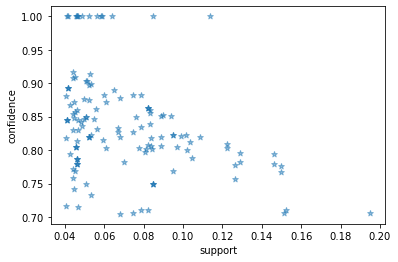

In [15]:

import matplotlib.pyplot as plt

plt.scatter(rules.support, rules.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

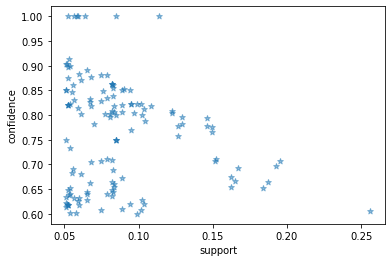

In [16]:
import matplotlib.pyplot as plt

plt.scatter(rules1.support, rules1.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

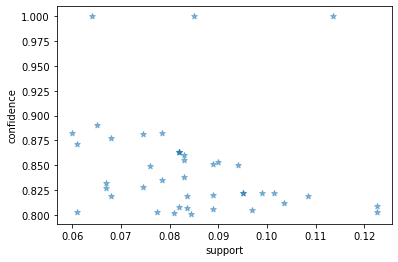

In [17]:
import matplotlib.pyplot as plt

plt.scatter(rules2.support, rules2.confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [18]:
rules.to_csv('rules_book.csv')

In [19]:
rules1.to_csv('rules_book1.csv')

In [20]:
rules2.to_csv('rules_book2.csv')

In [21]:
from pyvis import network as net
import networkx as nx

In [22]:
p= net.Network(notebook=True)
nxg = nx.complete_graph(18)
p.from_nx(nxg)
p.show('rules_book.html')

In [23]:
p= net.Network(notebook=True)
nxg = nx.complete_graph(18)
p.from_nx(nxg)
p.show('rules_book1.html')

In [24]:
p= net.Network(notebook=True)
nxg = nx.complete_graph(18)
p.from_nx(nxg)
p.show('rules_book2.html')